In [4]:
%load_ext watermark
%watermark

2017-10-16T15:56:33+02:00

CPython 3.6.1
IPython 5.3.0

compiler   : GCC 4.8.2 20140120 (Red Hat 4.8.2-15)
system     : Linux
release    : 4.10.0-37-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit


In [42]:
from IPython.display import Image
import pandas as pd
import numpy as np

In [43]:
datos = pd.read_csv("data/datos_procesamiento.csv")

In [44]:
datos.head()

col_inexistente1  col2      col3  col_outliers  col_outliers2  \
0              59.0  52.0  2.232832           -50       0.771666   
1              31.0  74.0  0.906147            -5       1.068558   
2              81.0  28.0  0.626750           -32       0.846396   
3              34.0  16.0  0.816738           -84       0.637381   
4              32.0  28.0  0.571131            65       4.540614   

  col_categorica col_ordinal  \
0          ratón    muy bien   
1       elefante     regular   
2          ratón     muy mal   
3           gato         mal   
4           gato        bien   

                                           col_texto  objetivo  
0  Tenía en su casa una ama que pasaba de los cua...         1  
1  El resto della concluían sayo de velarte, calz...         0  
2  El resto della concluían sayo de velarte, calz...         0  
3  Una olla de algo más vaca que carnero, salpicó...         0  
4  Tenía en su casa una ama que pasaba de los cua...         0

In [45]:
from sklearn import preprocessing, feature_extraction

Como vimos en un apartado anterior, en este ejemplo vamos a modificar cada variable en función de su tipo. Al conjunto de pasos que siguen los datos se le llama comúnmente **Pipelines** (literalmente, sistemas de tuberias).

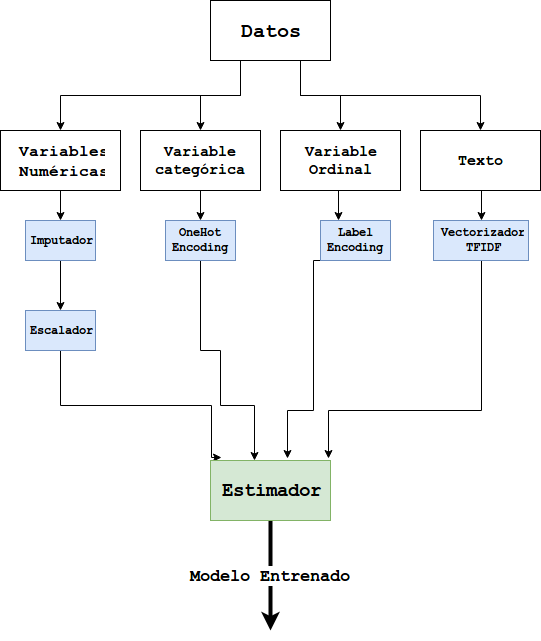

In [46]:
Image("../../media/pipeline.png")

**INCISO**

vamos a modificar dos transformadores de scikitlearn para que sean compatibles con pipelines. Este paso es necesario en la version actual de scikit-learn, pero seguramente será arreglado en el futuro

In [47]:
class BinarizadorCategorico(preprocessing.LabelBinarizer):
    def fit(self, X, y=None):
        super(BinarizadorCategorico, self).fit(X)
        
    def transform(self, X, y=None):
        return super(BinarizadorCategorico, self).transform(X)

    def fit_transform(self, X, y=None):
        return super(BinarizadorCategorico, self).fit(X).transform(X)
    
    
class CodificadorCategorico(preprocessing.LabelEncoder):
    def fit(self, X, y=None):
        super(CodificadorCategorico, self).fit(X)
        
    def transform(self, X, y=None):
        return super(CodificadorCategorico, self).transform(X)

    def fit_transform(self, X, y=None):
        return super(CodificadorCategorico, self).fit(X).transform(X)    

En primer lugar vamos a definir los transformadores de forma similar a como hicimos la última vez, solo que en vez de usar `OneHotEncoder` vamos a usar nuestra version de sklearn `LabelBinarizer` que hace la codificación one hot directamente sobre una variable categórica.

In [48]:
from sklearn.linear_model import LogisticRegression

col_numericas =  ['col_inexistente1', 'col2', 'col3', 'col_outliers', 'col_outliers2']
col_categorica = ['col_categorica']
col_texto = ['col_texto']
col_ordinal = ['col_ordinal']

imputador = preprocessing.Imputer()
escalador = preprocessing.StandardScaler()

transformador_ordinal = CodificadorCategorico()
transformador_categorico = BinarizadorCategorico()

transformador_texto = feature_extraction.text.TfidfVectorizer()

estimador = LogisticRegression()

Vemos que con el Binarizador transformamos como:

In [50]:
datos[col_categorica]

col_categorica
0            ratón
1         elefante
2            ratón
3             gato
4             gato
5            perro
6            perro
7            perro
8         elefante
9         elefante
10           perro
11        elefante
12            gato
13           ratón
14            gato
15           ratón
16        elefante
17           ratón
18           ratón
19        elefante
20           ratón
21           ratón
22           ratón
23            gato
24            gato
25           ratón
26            gato
27        elefante
28            gato
29        elefante
..             ...
970          ratón
971           gato
972       elefante
973          perro
974          perro
975       elefante
976          ratón
977          perro
978       elefante
979          ratón
980           gato
981          perro
982          ratón
983           gato
984           gato
985          ratón
986          ratón
987           gato
988          perro
989          perro
990          perro
991       elefante
992           gato
993          ratón
994          ratón
995       elefante
996          ratón
997       elefante
998       elefante
999       elefante

[1000 rows x 1 columns]

In [49]:
transformador_categorico.fit_transform(datos[col_categorica])

array([[0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       ..., 
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0]])

Que es mucho más sencillo que cómo lo hicimos la vez anterior:

In [51]:
preprocessing.OneHotEncoder().fit_transform(
    transformador_ordinal.fit_transform(datos[col_categorica]).reshape(1000,1)
).toarray()

/home/manuel/anaconda3/envs/data/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/manuel/anaconda3/envs/data/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       ..., 
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.]])

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
from sklearn.pipeline import Pipeline

Un pipeline de sklearn se define como una secuencia de pasos. Cada paso se define con una tupla de forma `[nombre del paso, transformador]`

Por ejemplo, si queremos crear un pipeline que procese las variables numéricas, primero imputándolas y después estandarizandolas, podriamos crear un pipeline como:

In [54]:
transformador_numerico = Pipeline(
     [('imputador', imputador), ('escalador', escalador)]
)

In [55]:
transformador_numerico

Pipeline(memory=None,
     steps=[('imputador', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('escalador', StandardScaler(copy=True, with_mean=True, with_std=True))])

Ahora tenemos definidos los pasos que queremos aplicar a cada variable.

In [56]:
transformador_numerico.fit_transform(datos[col_numericas])

array([[ 0.39921733,  0.08280686,  0.44281884, -0.69460006, -0.03836537],
       [-0.65360504,  0.86133291, -0.32339035, -0.11846597, -0.03827803],
       [ 1.22643491, -0.76649428, -0.4847522 , -0.46414642, -0.03834338],
       ..., 
       [-1.10481463,  0.11819441, -0.42094381,  0.88016644, -0.03819664],
       [ 1.48964051,  1.56908386, -0.4077454 ,  0.81615154, -0.03818958],
       [ 1.7152453 ,  0.22435705, -0.13638793,  0.72653069, -0.03831468]])

Pero seguimos teniendo el mismo problema de siempre, como podemos aplicar determinados transformadores a determinadas variables?

Bien, para los casos en los que tenemos un dataframe de Pandas, una opcion es crear un transformador customizado que simplemente selecciones columnas de un dataframe.

En `scikit-learn` podemos crear nuestros propios transformadores creando una clase que herede de `TransformerMixin` y que tenga el mètodo `transform`.

In [58]:
from sklearn.base import TransformerMixin

class TransformadorBase(TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X

Vamos a crear dos transformadores, un `DenseTransformer` que convierte una matriz `sparse` en un array (tomado de [mlxtend](http://rasbt.github.io/mlxtend/), y `ColumnExtractor` que devuelve una selección de columnas. 

In [59]:
from sklearn.base import BaseEstimator

from scipy.sparse import issparse


# http://rasbt.github.io/mlxtend/
class DenseTransformer(BaseEstimator):
    def __init__(self, return_copy=True):
        self.return_copy = return_copy
        self.is_fitted = False

    def transform(self, X, y=None):
        if issparse(X):
            return X.toarray()
        elif self.return_copy:
            return X.copy()
        else:
            return X

    def fit(self, X, y=None):
        self.is_fitted = True
        return self

    def fit_transform(self, X, y=None):
        return self.transform(X=X, y=y)

class ColumnExtractor(TransformerMixin):

    def __init__(self, columns):
        self.columns = columns
        
    def transform(self, X, **transform_params):
        return X[self.columns].as_matrix()
        
    def fit(self, X, y=None, **fit_params):
        return self

Por ejemplo si creamos un ColumnExtractor pasandole las columnas numéricas tenemos un transformador que podemos usar en un pipeline y que simplemente selecciona un subgrupo de columnas (devolviendolas como matriz)

In [60]:
cext = ColumnExtractor(columns=col_numericas)

In [61]:
cext.fit_transform(datos)

array([[ 59.        ,  52.        ,   2.23283208, -50.        ,
          0.77166646],
       [ 31.        ,  74.        ,   0.90614714,  -5.        ,
          1.06855838],
       [ 81.        ,  28.        ,   0.62675042, -32.        ,
          0.84639576],
       ..., 
       [ 19.        ,  53.        ,   0.73723413,  73.        ,
          1.34525201],
       [ 88.        ,  94.        ,   0.76008706,  68.        ,   1.3692463 ],
       [ 94.        ,  56.        ,   1.2299403 ,  61.        ,
          0.94395714]])

Creamos ahora los pipelines para cada tipo de variable. En algunos casos he añadido pasos adicionales por dos motivos. El primero, que determinados elementos de sklearn esperan datos ligeramente distintos. En segundo lugar, para conseguir que la salida de cada pipeline tenga la misma forma (un array de arrays).

In [62]:
pipeline_numerico = Pipeline([
    ['selector_numerico', ColumnExtractor(columns=col_numericas)],
    ['transformador_numerico', transformador_numerico]
])

pipeline_numerico.fit_transform(datos)[:5]

array([[ 0.39921733,  0.08280686,  0.44281884, -0.69460006, -0.03836537],
       [-0.65360504,  0.86133291, -0.32339035, -0.11846597, -0.03827803],
       [ 1.22643491, -0.76649428, -0.4847522 , -0.46414642, -0.03834338],
       [-0.54080264, -1.19114485, -0.37502756, -1.12990136, -0.03840487],
       [-0.61600424, -0.76649428, -0.51687443,  0.77774261, -0.03725668]])

In [63]:
pipeline_texto = Pipeline([
        ['selector_texto', ColumnExtractor(columns=col_texto)],
        ['transformador_dim', preprocessing.FunctionTransformer(lambda x: x[:,0], validate=False)],
        ['transformador_texto', transformador_texto],
        ['texto_array', DenseTransformer()]
    ])

pipeline_texto.fit_transform(datos)[:5]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.20474512,  0.        ,  0.        ,  0.        ,  0.20474512,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.20474512,  0.        ,  0.        ,  0.20474512,
         0.        ,  0.        ,  0.        ,  0.20474512,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.20474512,  0.        ,  0.        ,  0.14641557,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.12243162,
         0.12073233,  0.        ,  0.20474512,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.10065821,  0.        ,  0.        ,  0. 

In [64]:
pipeline_categorico = Pipeline([
    ['selector_categorica', ColumnExtractor(columns=col_categorica)],
    ['transformador_categorico', transformador_categorico]
])

pipeline_categorico.fit_transform(datos)[:5]

array([[0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 1, 0, 0]])

En el caso del pipeline ordinal hay que manipular las dimensiones de los arrays dado que trabaja con un vector de dimension 1.

In [65]:
pipeline_ordinal = Pipeline([
    ['selector_ordinal', ColumnExtractor(columns=col_ordinal)],
    ['transformador_dim1', preprocessing.FunctionTransformer(lambda x: x[:,0], validate=False)],
    ['transformador_ordinal', transformador_ordinal],
    ['transformador_dim2', preprocessing.FunctionTransformer(lambda x: np.vstack(x[:]), validate=False)],
])


pipeline_ordinal.fit_transform(datos)[:5]

array([[2],
       [4],
       [3],
       [1],
       [0]])

Ya tenemos una manera de, dado un conjunto de datos, separarlos y aplicar distintas transformaciones a cada variable. Nos falta una manera de, una vez se han transformado, reunirlas de nuevo.

Para ello podemos usar `FeatureUnion`, que simplemente toma un conjunto de pasos de un pipeline y los une.

In [ ]:
from sklearn.pipeline import FeatureUnion

In [66]:
pipeline_procesado = FeatureUnion([
    ('variables_numericas', pipeline_numerico),
    ('variables_ordinales', pipeline_ordinal),
    ('variables_texto', pipeline_texto),
    ('variables_categoricas', pipeline_categorico),
])

In [67]:
pipeline_procesado

FeatureUnion(n_jobs=1,
       transformer_list=[('variables_numericas', Pipeline(memory=None,
     steps=[('selector_numerico', <__main__.ColumnExtractor object at 0x7f389c7fc860>), ['transformador_numerico', Pipeline(memory=None,
     steps=[('imputador', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose...transformador_categorico', BinarizadorCategorico(neg_label=0, pos_label=1, sparse_output=False)]]))],
       transformer_weights=None)

In [70]:
pipeline_procesado.fit_transform(datos)

array([[ 0.39921733,  0.08280686,  0.44281884, ...,  0.        ,
         0.        ,  1.        ],
       [-0.65360504,  0.86133291, -0.32339035, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.22643491, -0.76649428, -0.4847522 , ...,  0.        ,
         0.        ,  1.        ],
       ..., 
       [-1.10481463,  0.11819441, -0.42094381, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.48964051,  1.56908386, -0.4077454 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.7152453 ,  0.22435705, -0.13638793, ...,  0.        ,
         0.        ,  0.        ]])

Finalmente, necesitamos añadir un estimador al final para predecir en base a los datos transformados

In [71]:
pipeline_estimador = Pipeline([
    ('procesador', pipeline_procesado),
    ('estimador', estimador)
])

In [72]:
pipeline_estimador.fit(datos, datos.objetivo)

Pipeline(memory=None,
     steps=[('procesador', FeatureUnion(n_jobs=1,
       transformer_list=[('variables_numericas', Pipeline(memory=None,
     steps=[('selector_numerico', <__main__.ColumnExtractor object at 0x7f389c7fc860>), ['transformador_numerico', Pipeline(memory=None,
     steps=[('imputador', Imputer(axis=0, copy=...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [73]:
pipeline_estimador.predict(datos)[:5]

array([0, 1, 0, 1, 1])

El beneficio de los pipelines, no solo es tener codigo mas legible y poder gestionar de forma ordenada todo el ciclo de vida del modelado, sino que los pipelines tienen todos los beneficios de los objetos de scikitlearn, por ejemplo, podemos usar validacion cruzada directamente con el pipeline.

In [74]:
from sklearn.model_selection import cross_val_score

In [75]:
cross_val_score(pipeline_estimador, X=datos.drop('objetivo', axis=1), y=datos.objetivo, scoring='roc_auc', cv=5)

array([ 0.53326733,  0.48934893,  0.52035204,  0.49464946,  0.47535354])

La forma de usar `Pipeline` junto con `FeatureUnion` es la forma mas comun de usar pipelines. Sin embargo, existe una forma mas simplificada en la que no le asignamos nombres a los elementos.

In [76]:
from sklearn.pipeline import make_pipeline, make_union

In [77]:
pipeline_simple = make_pipeline(
    make_union(
       pipeline_numerico,
       pipeline_ordinal,
       pipeline_texto,
       pipeline_categorico,
    ),
    estimador
)

In [78]:
pipeline_simple

Pipeline(memory=None,
     steps=[('featureunion', FeatureUnion(n_jobs=1,
       transformer_list=[('pipeline-1', Pipeline(memory=None,
     steps=[('selector_numerico', <__main__.ColumnExtractor object at 0x7f389c7fc860>), ['transformador_numerico', Pipeline(memory=None,
     steps=[('imputador', Imputer(axis=0, copy=True, m...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [79]:
cross_val_score(pipeline_simple, X=datos.drop('objetivo', axis=1), y=datos.objetivo, scoring='roc_auc', cv=5)

array([ 0.53326733,  0.48934893,  0.52035204,  0.49464946,  0.47535354])

Para aquellos casos en los que los datos que tengamos nos permitan trabajar con DataFrames de pandas (datasets tabulares) podemos usar [sklearn-pandas](https://github.com/pandas-dev/sklearn-pandas) que hace el uso de pipelines de scikit-learn bastante mas sencillo.

In [80]:
!pip install sklearn-pandas

In [81]:
from sklearn_pandas import DataFrameMapper, cross_val_score as sklearn_pandas_cross_val_score

In [82]:
datos.head()

col_inexistente1  col2      col3  col_outliers  col_outliers2  \
0              59.0  52.0  2.232832           -50       0.771666   
1              31.0  74.0  0.906147            -5       1.068558   
2              81.0  28.0  0.626750           -32       0.846396   
3              34.0  16.0  0.816738           -84       0.637381   
4              32.0  28.0  0.571131            65       4.540614   

  col_categorica col_ordinal  \
0          ratón    muy bien   
1       elefante     regular   
2          ratón     muy mal   
3           gato         mal   
4           gato        bien   

                                           col_texto  objetivo  
0  Tenía en su casa una ama que pasaba de los cua...         1  
1  El resto della concluían sayo de velarte, calz...         0  
2  El resto della concluían sayo de velarte, calz...         0  
3  Una olla de algo más vaca que carnero, salpicó...         0  
4  Tenía en su casa una ama que pasaba de los cua...         0

In [83]:
mapeador = DataFrameMapper([
     (['col_inexistente1'], transformador_numerico),
     (['col2'], transformador_numerico),
     (["col3"], transformador_numerico),
    (["col_outliers"], transformador_numerico),
    (["col_outliers2"], transformador_numerico),
    ("col_categorica", transformador_categorico),
    ("col_ordinal", transformador_ordinal),
    ("col_texto", transformador_texto)
 ])

In [86]:
mapeador.fit_transform(datos.copy())

array([[-0.02123668, -0.02329583, -0.03793554, ...,  0.        ,
         0.        ,  0.        ],
       [-0.02947328, -0.01682422, -0.03832581, ...,  0.        ,
         0.        ,  0.        ],
       [-0.01476508, -0.03035577, -0.038408  , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [-0.03300325, -0.02300167, -0.0383755 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.01270593, -0.01094094, -0.03836877, ...,  0.        ,
         0.        ,  0.19788701],
       [-0.01094094, -0.02211918, -0.03823056, ...,  0.        ,
         0.        ,  0.        ]])

In [87]:
mapeador.features

[(['col_inexistente1'], Pipeline(memory=None,
       steps=[('imputador', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('escalador', StandardScaler(copy=True, with_mean=True, with_std=True))])),
 (['col2'], Pipeline(memory=None,
       steps=[('imputador', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('escalador', StandardScaler(copy=True, with_mean=True, with_std=True))])),
 (['col3'], Pipeline(memory=None,
       steps=[('imputador', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('escalador', StandardScaler(copy=True, with_mean=True, with_std=True))])),
 (['col_outliers'], Pipeline(memory=None,
       steps=[('imputador', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('escalador', StandardScaler(copy=True, with_mean=True, with_std=True))])),
 (['col_outliers2'], Pipeline(memory=None,
       steps=[('imputador', Imputer(axis=0, copy=True, missing_values

In [88]:
mapeador.transformed_names_

['col_inexistente1',
 'col2',
 'col3',
 'col_outliers',
 'col_outliers2',
 'col_categorica_elefante',
 'col_categorica_gato',
 'col_categorica_perro',
 'col_categorica_ratón',
 'col_ordinal',
 'col_texto_acordarme',
 'col_texto_adarga',
 'col_texto_algo',
 'col_texto_alguna',
 'col_texto_algún',
 'col_texto_ama',
 'col_texto_amigo',
 'col_texto_antigua',
 'col_texto_astillero',
 'col_texto_así',
 'col_texto_aunque',
 'col_texto_autores',
 'col_texto_añadidura',
 'col_texto_años',
 'col_texto_basta',
 'col_texto_calzas',
 'col_texto_campo',
 'col_texto_carnero',
 'col_texto_carnes',
 'col_texto_casa',
 'col_texto_caso',
 'col_texto_caza',
 'col_texto_cincuenta',
 'col_texto_como',
 'col_texto_complexión',
 'col_texto_con',
 'col_texto_concluían',
 'col_texto_conjeturas',
 'col_texto_consumían',
 'col_texto_corredor',
 'col_texto_cuarenta',
 'col_texto_cuento',
 'col_texto_cuyo',
 'col_texto_de',
 'col_texto_decir',
 'col_texto_deja',
 'col_texto_della',
 'col_texto_deste',
 'col_texto_d

In [89]:
pipeline_estimador_pandas_sklearn = Pipeline([
    ('procesador', mapeador),
    ('estimador', estimador)
])

In [90]:
sklearn_pandas_cross_val_score(pipeline_estimador_pandas_sklearn, X=datos.drop('objetivo', axis=1).copy(),
                               y=datos.objetivo, scoring='roc_auc', cv=5)

array([ 0.53326733,  0.48934893,  0.52035204,  0.49464946,  0.47535354])